<a href="https://colab.research.google.com/github/taliyameyswara/shoes-classification/blob/main/Exercise_Syarat_Quiz_8_Taliya_Meyswara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Klasifikasi Sepatu Teman Saya 🛼👟🥾**
Menggunakan model:
*   Convolution Neural Network (CNN)
*   Recurrent Neural Network (RNN)
*   Long Short Term Memory (LSTM)
> Exercise Syarat Quiz 8 - Taliya Meyswara <br>
> 🧏‍♂️ Taliya Meyswara - taliyameyswara@gmail.com

# **Mempersiapkan Dataset 🔋**
Menggunakan [Dataset Private Sepatu](https://drive.google.com/drive/folders/1iDMdIEqzIvusp9g9I8VH7dbh4BO6H_YH?usp=sharing)

In [1]:
# mengakses folder di drive

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

# Access a specific file or folder
base_dir = '/content/drive/MyDrive/Semester 4/Machine Learning/Exercise Syarat Quiz 8 - Taliya Meyswara/dataset'
os.listdir(base_dir)

['neena',
 'aisyah',
 'mario',
 'adel',
 'erna',
 'wahyu',
 'erik',
 'bambang',
 'tius',
 'yuda']

# **Augmentasi Data 🧩**
Augmentasi gambar merupakan sebuah teknik yang dapat digunakan untuk memperbanyak data latih dengan cara menduplikasi gambar yang telah ada dengan menambahkan variasi tertentu.

Menerapkan ImageDataGenerator untuk data latih dan data validasi (preprocessing data, pelabelan sampel otomatis, dan augmentasi gambar.)

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size = 150
batch_size=10

datagen = ImageDataGenerator(rescale=1/255.,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest',
                             validation_split=0.4) # validation set 40%

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def Show_Images(target_gen):
    # Get a batch of images and labels
    batch_images, batch_labels = next(target_gen)

    # Get class labels
    class_labels = list(target_gen.class_indices.keys())

    # Display images with labels
    plt.figure(figsize=(8, 8))
    for n , i in enumerate(list(np.random.randint(0,len(batch_images),16))):
        plt.subplot(4, 4, n + 1)
        plt.imshow(batch_images[i])
        plt.title(class_labels[np.argmax(batch_labels[i])])  # Display the class label
        plt.axis('off')
    plt.show()

Found 60 images belonging to 10 classes.


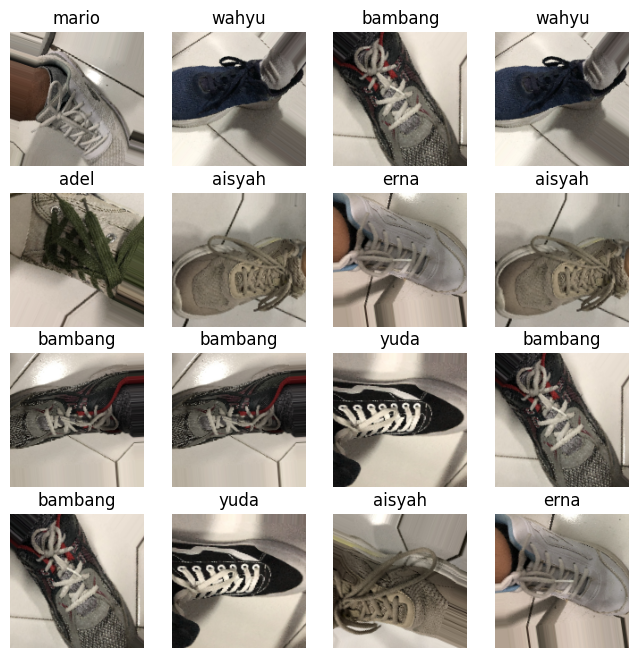

In [5]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical',
    subset='training')

Show_Images(train_generator)

Found 40 images belonging to 10 classes.


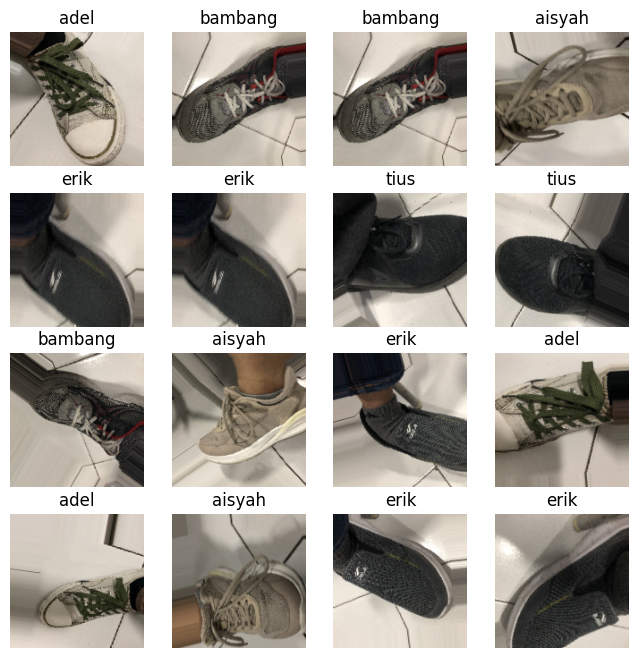

In [6]:
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    shuffle=False,
    class_mode='categorical',
    subset='validation')

Show_Images(validation_generator)

# **Membuat Model CNN🕺**

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Parameters
img_size = 150  # Adjust based on your image size
num_classes = 10  # Adjust based on your number of classes

# Define the model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')  # Jumlah kelas = 10
])

# Compile the model
model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

# **Melatih Model CNN (Model Fitting)👩‍🏫**

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)


# Train the model
history = model_cnn.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

# Print the training and validation accuracy
print("Training accuracy:", history.history['accuracy'][-1])
print("Validation accuracy:", history.history['val_accuracy'][-1])

Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 0.2921 - accuracy: 0.9167

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 8s 1s/step - loss: 0.2921 - accuracy: 0.9167 - val_loss: 0.6128 - val_accuracy: 0.8250 - lr: 2.0000e-04
Epoch 2/20
6/6 [==============================] - 6s 1s/step - loss: 0.4217 - accuracy: 0.8500 - val_loss: 0.4128 - val_accuracy: 0.9000 - lr: 2.0000e-04
Epoch 3/20
6/6 [==============================] - 6s 1s/step - loss: 0.2864 - accuracy: 0.9167 - val_loss: 0.5972 - val_accuracy: 0.8250 - lr: 2.0000e-04
Epoch 4/20
6/6 [==============================] - 8s 2s/step - loss: 0.2548 - accuracy: 0.9333 - val_loss: 0.4768 - val_accuracy: 0.8500 - lr: 2.0000e-04
Epoch 5/20
6/6 [==============================] - 6s 1s/step - loss: 0.2495 - accuracy: 0.9000 - val_loss: 0.3593 - val_accuracy: 0.9000 - lr: 2.0000e-04
Epoch 6/20
6/6 [==============================] - 6s 1s/step - loss: 0.2581 - accuracy: 0.9167 - val_loss: 0.4904 - val_accuracy: 0.7750 - lr: 2.0000e-04
Epoch 7/20
6/6 [==============================] - 6s 1s/step - loss: 0.2508 - accuracy:

# **Evaluasi Model CNN✅**

In [13]:
from sklearn.metrics import f1_score

y_true = validation_generator.classes
y_pred = np.argmax(model_cnn.predict(validation_generator), axis=1)

f1 = f1_score(y_true, y_pred, average='weighted')

print("F1 Score:", f1)

2/2 [==============================] - 2s 437ms/step
F1 Score: 0.8219336219336218


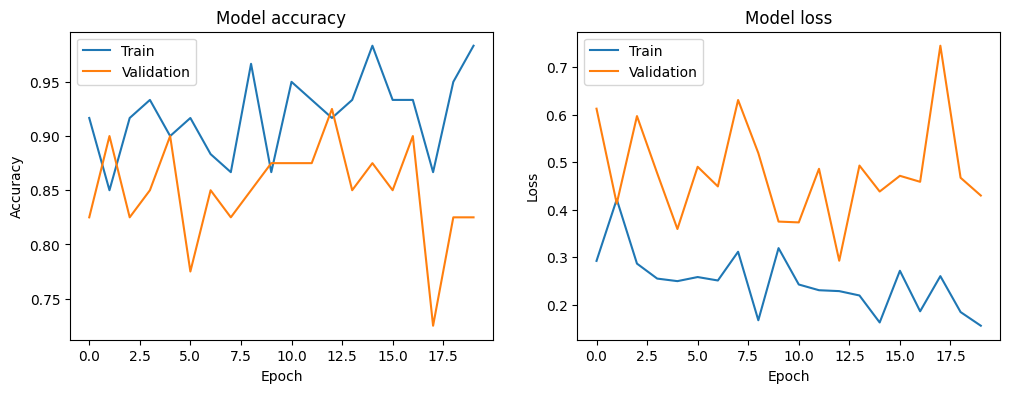

In [14]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
model_cnn.save('/content/drive/MyDrive/Semester 4/Machine Learning/Exercise Syarat Quiz 8 - Taliya Meyswara/model/model_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saving IMG_4463.png to IMG_4463 (1).png


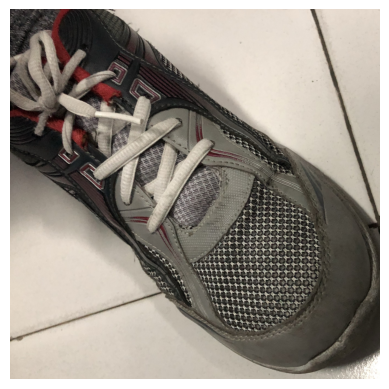

1/1 [==============================] - 0s 296ms/step
Predicted Label: bambang


In [18]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import files

# Fungsi untuk memproses gambar
def process_image_for_prediction(image_path):
    img = Image.open(image_path)
    img = img.resize((150, 150))  # Resize to the expected input size
    img = img.convert('RGB')  # Convert to RGB to have 3 channels
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Menambahkan batch size
    return img_array

# Fungsi untuk memprediksi gambar baru menggunakan model yang telah dilatih
def predict_image(model_path, image_path, label_names):
    model = load_model(model_path)
    img_array = process_image_for_prediction(image_path)
    prediction = model.predict(img_array)
    predicted_label = label_names[np.argmax(prediction)]
    return predicted_label

# Assuming 'base_dir' contains the folders for each class
base_dir = '/content/drive/MyDrive/Semester 4/Machine Learning/Exercise Syarat Quiz 8 - Taliya Meyswara/dataset'
label_names = sorted(os.listdir(base_dir))

# Upload an image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get the uploaded image file path

# Define the model path
model_path = '/content/drive/MyDrive/Semester 4/Machine Learning/Exercise Syarat Quiz 8 - Taliya Meyswara/model/model_cnn.h5'  # model cnn
# Display the uploaded image
plt.imshow(Image.open(image_path))
plt.axis('off')
plt.show()

# Predict the label of the uploaded image
predicted_label = predict_image(model_path, image_path, label_names)
print(f"Predicted Label: {predicted_label}")

# **Membuat Model RNN🤓**

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, TimeDistributed, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Example parameters (replace with your actual values)
num_classes = 10
input_shape = (10, 150, 150, 3)  # Example input shape assuming 10 images of size 150x150 with 3 channels

# Define the model
model_rnn = Sequential([
    TimeDistributed(Flatten(input_shape=(input_shape[1:]))),
    SimpleRNN(128, return_sequences=True),
    SimpleRNN(128),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(num_classes, activation='softmax')
])

# Build the model
model_rnn.build(input_shape=(None,) + input_shape[1:])  # Specify the input shape

# Compile the model
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_rnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_1 (TimeDi  (None, 150, 450)          0         
 stributed)                                                      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 150, 128)          74112     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 512)               66048     
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 10)               

# **Melatih Model RNN (Model Fitting)👩‍🏫**

In [24]:
# Train the model
history = model_rnn.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

# Print the training and validation accuracy from history
print("Training accuracy:", history.history['accuracy'][-1])
print("Validation accuracy:", history.history['val_accuracy'][-1])

Epoch 1/20
6/6 [==============================] - 8s 1s/step - loss: 2.3452 - accuracy: 0.1333 - val_loss: 2.3480 - val_accuracy: 0.1000 - lr: 4.0000e-05
Epoch 2/20
6/6 [==============================] - 6s 1s/step - loss: 2.5209 - accuracy: 0.1167 - val_loss: 2.3685 - val_accuracy: 0.1000 - lr: 4.0000e-05
Epoch 3/20
6/6 [==============================] - 7s 1s/step - loss: 2.4309 - accuracy: 0.1667 - val_loss: 2.3553 - val_accuracy: 0.1000 - lr: 4.0000e-05
Epoch 4/20
6/6 [==============================] - 7s 1s/step - loss: 2.3438 - accuracy: 0.1500 - val_loss: 2.3618 - val_accuracy: 0.1000 - lr: 4.0000e-05
Epoch 5/20
6/6 [==============================] - 6s 1s/step - loss: 2.4013 - accuracy: 0.1500 - val_loss: 2.3582 - val_accuracy: 0.1250 - lr: 4.0000e-05
Epoch 6/20
6/6 [==============================] - 6s 1s/step - loss: 2.2411 - accuracy: 0.1333 - val_loss: 2.3559 - val_accuracy: 0.1000 - lr: 4.0000e-05
Epoch 7/20
6/6 [==============================] - 7s 1s/step - loss: 2.2808 

# **Evaluasi Model RNN✅**

In [25]:
from sklearn.metrics import f1_score

y_true = validation_generator.classes
y_pred = np.argmax(model_rnn.predict(validation_generator), axis=1)

f1 = f1_score(y_true, y_pred, average='weighted')

print("F1 Score:", f1)

2/2 [==============================] - 3s 544ms/step
F1 Score: 0.02222222222222222


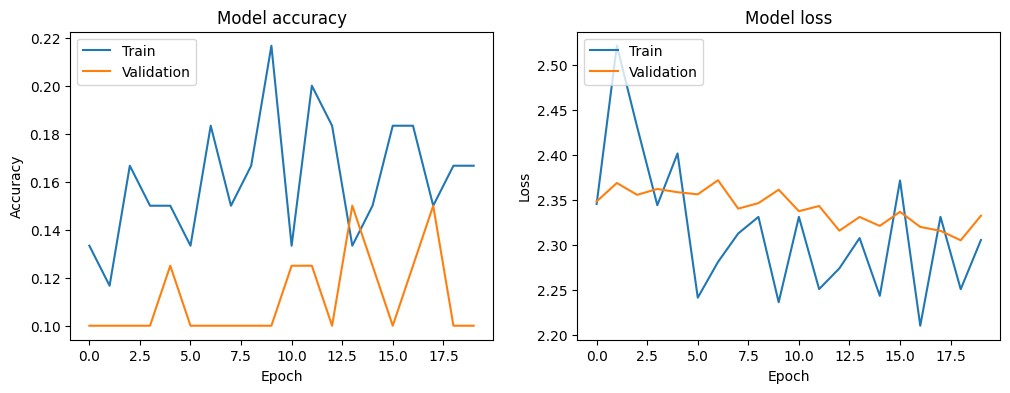

In [26]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [30]:
model_rnn.save('/content/drive/MyDrive/Semester 4/Machine Learning/Exercise Syarat Quiz 8 - Taliya Meyswara/model/model_rnn.h5')

Saving IMG_4463.png to IMG_4463 (3).png


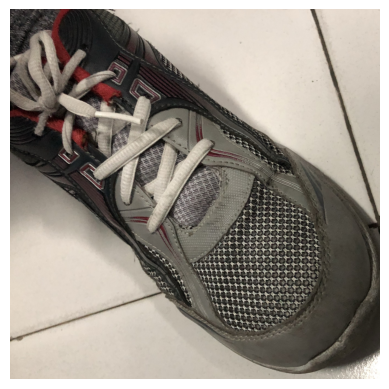

1/1 [==============================] - 0s 70ms/step
Predicted Label: erna


In [43]:
# Function to process image for prediction
def process_image_for_prediction(image_path):
    img = Image.open(image_path)
    img = img.resize((150, 150))  # Resize to the expected input size
    img = img.convert('RGB')  # Convert to RGB to have 3 channels
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Function to predict image label using the RNN model
def predict_image(model, image_path, label_names):
    img_array = process_image_for_prediction(image_path)
    prediction = model.predict(img_array)
    predicted_label = label_names[np.argmax(prediction)]
    return predicted_label

# Assuming 'base_dir' contains the folders for each class
base_dir = '/content/drive/MyDrive/Semester 4/Machine Learning/Exercise Syarat Quiz 8 - Taliya Meyswara/dataset'
label_names = sorted(os.listdir(base_dir))

# Function to upload an image and predict its label
def upload_image_and_predict(model, label_names):
    uploaded = files.upload()  # Upload an image
    image_path = list(uploaded.keys())[0]  # Get the uploaded image file path

    # Display the uploaded image
    plt.imshow(Image.open(image_path))
    plt.axis('off')
    plt.show()

    # Predict the label of the uploaded image
    predicted_label = predict_image(model, image_path, label_names)
    print(f"Predicted Label: {predicted_label}")

# Test the function with the RNN model
upload_image_and_predict(model_rnn, label_names)

# **Membuat Model LSTM😋**

In [34]:
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, TimeDistributed, Flatten, Dropout, BatchNormalization
# Define the model
model_lstm = Sequential([
    TimeDistributed(Flatten(input_shape=(input_shape[1:]))),  # Flatten the input images
    LSTM(128, return_sequences=True),  # First LSTM layer
    LSTM(128),  # Second LSTM layer
    Dense(512, activation='relu'),  # Dense layer with 512 units
    BatchNormalization(),  # Batch normalization
    Dense(num_classes, activation='softmax')  # Output layer with number of classes
])

# Build the model
model_lstm.build(input_shape=(None,) + input_shape[1:])  # Specify the input shape

# Compile the model
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_2 (TimeDi  (None, 150, 450)          0         
 stributed)                                                      
                                                                 
 lstm (LSTM)                 (None, 150, 128)          296448    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_6 (Dense)             (None, 512)               66048     
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 10)               

# **Melatih Model LSTM (Model Fitting)👩‍🏫**

In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)


# Train the model
history = model_lstm.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

# Print the training and validation accuracy
print("Training accuracy:", history.history['accuracy'][-1])
print("Validation accuracy:", history.history['val_accuracy'][-1])

Epoch 1/20
6/6 [==============================] - 8s 1s/step - loss: 2.0078 - accuracy: 0.2667 - val_loss: 2.3038 - val_accuracy: 0.1000 - lr: 2.0000e-04
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 5s 855ms/step - loss: 1.9298 - accuracy: 0.3167 - val_loss: 2.3056 - val_accuracy: 0.1000 - lr: 2.0000e-04
Epoch 3/20
6/6 [==============================] - 5s 929ms/step - loss: 2.0629 - accuracy: 0.2667 - val_loss: 2.3058 - val_accuracy: 0.1000 - lr: 2.0000e-04
Epoch 4/20
6/6 [==============================] - 6s 1s/step - loss: 2.0427 - accuracy: 0.2167 - val_loss: 2.2973 - val_accuracy: 0.1000 - lr: 2.0000e-04
Epoch 5/20
6/6 [==============================] - 5s 873ms/step - loss: 1.9341 - accuracy: 0.2833 - val_loss: 2.2697 - val_accuracy: 0.1000 - lr: 2.0000e-04
Epoch 6/20
6/6 [==============================] - 8s 2s/step - loss: 2.0156 - accuracy: 0.2333 - val_loss: 2.2704 - val_accuracy: 0.2250 - lr: 2.0000e-04
Epoch 7/20
6/6 [==============================] - 5s 891ms/step - loss: 1.9994 - accuracy: 0.2000 - val_loss: 2.2565 - val_accuracy: 0.2000 - lr: 2.0000e-04
Epoch 8/20
6/6 [==============================] - 8s 2s/step - loss: 2.0165

# **Evaluasi Model LSTM✅**

In [38]:
from sklearn.metrics import f1_score

y_true = validation_generator.classes
y_pred = np.argmax(model_lstm.predict(validation_generator), axis=1)

f1 = f1_score(y_true, y_pred, average='weighted')

print("F1 Score:", f1)

2/2 [==============================] - 3s 323ms/step
F1 Score: 0.3252380952380952


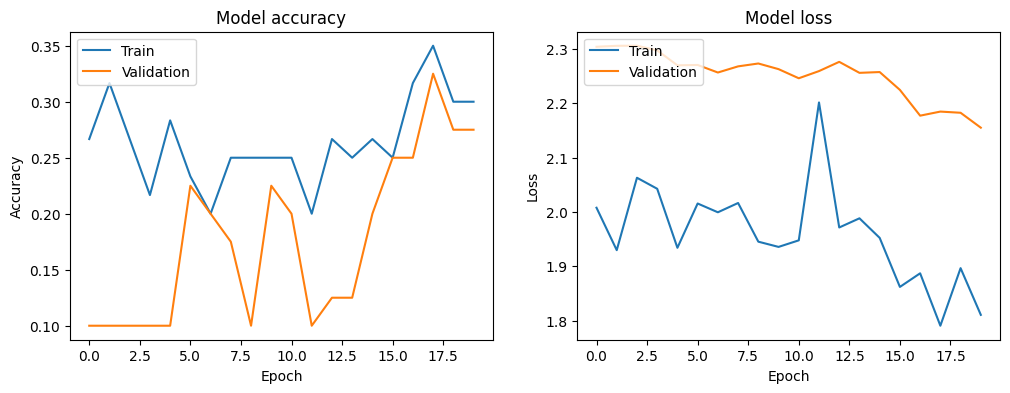

In [39]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
model_lstm.save('/content/drive/MyDrive/Semester 4/Machine Learning/Exercise Syarat Quiz 8 - Taliya Meyswara/model/model_lstm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saving IMG_4341.png to IMG_4341.png


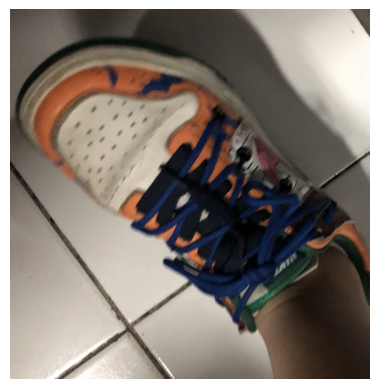

1/1 [==============================] - 1s 635ms/step
Predicted Label: bambang


In [41]:
# Function to process image for prediction
def process_image_for_prediction(image_path):
    img = Image.open(image_path)
    img = img.resize((150, 150))  # Resize to the expected input size
    img = img.convert('RGB')  # Convert to RGB to have 3 channels
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Function to predict image label using the LSTM model
def predict_image(model, image_path, label_names):
    img_array = process_image_for_prediction(image_path)
    prediction = model.predict(img_array)
    predicted_label = label_names[np.argmax(prediction)]
    return predicted_label

# Assuming 'base_dir' contains the folders for each class
base_dir = '/content/drive/MyDrive/Semester 4/Machine Learning/Exercise Syarat Quiz 8 - Taliya Meyswara/dataset'
label_names = sorted(os.listdir(base_dir))

# Function to upload an image
def upload_image_and_predict(model, label_names):
    uploaded = files.upload()  # Upload an image
    image_path = list(uploaded.keys())[0]  # Get the uploaded image file path

    # Display the uploaded image
    plt.imshow(Image.open(image_path))
    plt.axis('off')
    plt.show()

    # Predict the label of the uploaded image
    predicted_label = predict_image(model, image_path, label_names)
    print(f"Predicted Label: {predicted_label}")

# Test the function with the LSTM model
upload_image_and_predict(model_lstm, label_names)

# **Perbandingan Akurasi CNN, RNN, LSTM🤔**

In [44]:
from sklearn.metrics import f1_score

y_true = validation_generator.classes
y_pred_cnn = np.argmax(model_cnn.predict(validation_generator), axis=1)
y_pred_rnn = np.argmax(model_rnn.predict(validation_generator), axis=1)
y_pred_lstm = np.argmax(model_lstm.predict(validation_generator), axis=1)

acc_cnn = f1_score(y_true, y_pred_cnn, average='weighted')
acc_rnn = f1_score(y_true, y_pred_rnn, average='weighted')
acc_lstm = f1_score(y_true, y_pred_lstm, average='weighted')

print("Accuracy CNN:", acc_cnn)
print("Accuracy RNN:", acc_rnn)
print("Accuracy LSTM:", acc_lstm)

2/2 [==============================] - 3s 378ms/step
Accuracy CNN: 0.8526984126984128
Accuracy RNN: 0.05
Accuracy LSTM: 0.13855263157894737
